# Ê®°ÂûãÈÉ®ÁΩ≤ÊµÅÁ®ã Plug and Play Moduls

ÂèÇËÄÉÊñáÁåÆÔºö

1. https://zhuanlan.zhihu.com/p/589411751ÔºöÈÉ®ÁΩ≤‰∏éÈáèÂåñÁöÑÊï¥‰∏™ÊµÅÁ®ãÔºõ
2. https://blog.csdn.net/qq_34218078/article/details/127521819ÔºöPTQÈùôÊÄÅÂØπÁß∞ÈáèÂåñÁöÑpytorchÂÆûÁé∞


ÂæÖÈòÖËØªÔºö
1. https://mp.weixin.qq.com/s?__biz=Mzg3ODU2MzY5MA==&mid=2247488318&idx=1&sn=048c1b78f3b2cb25c05abb115f20d6c6&chksm=cf108b3bf867022d1b214928102d65ed691c81955b59ca02bccdee92584ad9aa8e390e1d2978#rd
ÂøÖÁúãÈÉ®ÁΩ≤Á≥ªÂàó~ÊáÇ‰Ω†ÁöÑÁ•ûÁªèÁΩëÁªúÈáèÂåñÊïôÁ®ãÔºöÁ¨¨‰∏ÄËÆ≤ÔºÅ
2. https://github.com/Susan19900316/yolov5_tensorrt_int8/tree/master 
   ÂØπTRT INT8‰ºòÂåñÁöÑpythonÂÆûÁé∞
3. 

## Step1: Ê®°ÂûãÁ¶ªÁ∫øËÆ≠ÁªÉÂíåÂéãÁº©pytrochÊ®°ÂûãËÆ≠ÁªÉ

Ê®°ÂûãÂâ™Êûù„ÄÅËí∏È¶è‰∏§‰∏™ÊäÄÂ∑ß

### Ê®°ÂûãÂâ™Êûù

#### ÁªÜÁ≤íÂ∫¶Ââ™Êûù  BCK1K2‰∏≠ÁöÑK1K2‰∏≠ÁöÑÊúâËßÑÂàôÁöÑ‰∏Ä‰∫õÁÇπ‰Ωç

Âú®Êé©Á†ÅÂâ™Êûù‰∏≠Ôºå‰∏ÄÊó¶ÁîüÊàê‰∫ÜÊé©Á†ÅÁü©ÈòµÔºàÈÄöÂ∏∏ÊòØ‰∏Ä‰∏™‰∏éÊùÉÈáçÁü©ÈòµÂêåÂΩ¢Áä∂ÁöÑ‰∫åËøõÂà∂Áü©ÈòµÔºâÔºå‰Ω†ÂèØ‰ª•Áõ¥Êé•‰ΩøÁî®Êé©Á†Å‰∏éÊùÉÈáçËøõË°åÂÖÉÁ¥†Á∫ßÂà´ÁöÑËøêÁÆóÔºåËÄåÊó†ÈúÄÂÜçÈÅçÂéÜÊï¥‰∏™Áü©Èòµ„ÄÇËøô‰ΩøÂæóÂâ™ÊûùÁöÑËøáÁ®ãÂèØ‰ª•ÈÄöËøáÂêëÈáèÂåñÊìç‰ΩúÊù•Âä†ÈÄüÔºåÂ∞§ÂÖ∂ÊòØÂú®‰ΩøÁî® GPU Êó∂ÔºåÂêëÈáèÂåñÂíåÁü©ÈòµÊìç‰ΩúÊØîÈÄêÂÖÉÁ¥†ÈÅçÂéÜÊõ¥È´òÊïà„ÄÇ

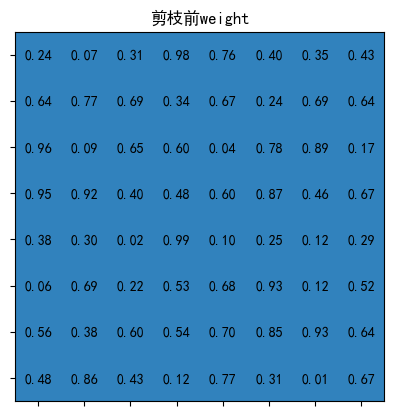

_fine_grained_prune ÂáΩÊï∞ÁöÑÊâßË°åÊó∂Èó¥‰∏∫Ôºö0.00099945 Áßí


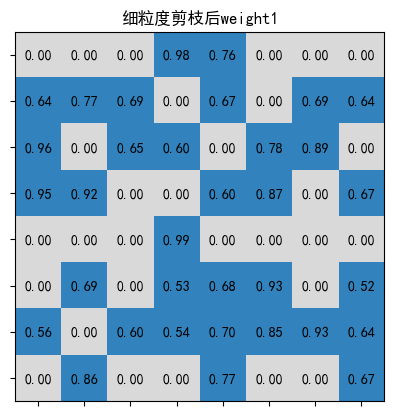

fine_grained_prune ÂáΩÊï∞ÁöÑÊâßË°åÊó∂Èó¥‰∏∫Ôºö0.00000000 Áßí


In [5]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

plt.rcParams['font.sans-serif'] = ['SimHei']  # Ëß£ÂÜ≥‰∏≠Êñá‰π±Á†Å

def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print("{} ÂáΩÊï∞ÁöÑÊâßË°åÊó∂Èó¥‰∏∫Ôºö{:.8f} Áßí".format(func.__name__, execution_time))
        return result
    return wrapper


# ÂàõÂª∫‰∏Ä‰∏™ÂèØËßÜÂåñ2Áª¥Áü©ÈòµÂáΩÊï∞ÔºåÂ∞ÜÂÄº‰∏∫0ÁöÑÂÖÉÁ¥†‰∏éÂÖ∂‰ªñÂå∫ÂàÜÂºÄÔºàÁî®‰∫éÊòæÁ§∫Ââ™ÊûùÊïàÊûúÔºâ
def plot_tensor(tensor, title):
    # ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑÂõæÂÉèÂíåËΩ¥
    fig, ax = plt.subplots()

    # ‰ΩøÁî® CPU ‰∏äÁöÑÊï∞ÊçÆÔºåËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑÔºåÂπ∂Ê£ÄÊü•Áõ∏Á≠âÊù°‰ª∂ÔºåËÆæÁΩÆÈ¢úËâ≤Êò†Â∞Ñ
    ax.imshow(tensor.cpu().numpy() == 0, vmin=0, vmax=1, cmap='tab20c')
    ax.set_title(title)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    # ÈÅçÂéÜÁü©Èòµ‰∏≠ÁöÑÊØè‰∏™ÂÖÉÁ¥†Âπ∂Ê∑ªÂä†ÊñáÊú¨Ê†áÁ≠æ
    for i in range(tensor.shape[1]):
        for j in range(tensor.shape[0]):
            text = ax.text(j, i, f'{tensor[i, j].item():.2f}', ha="center", va="center", color="k")

    # ÊòæÁ§∫ÂõæÂÉè
    plt.show()


def test_plot_tensor():
    weight = torch.tensor([[-0.46, -0.40, 0.39, 0.19, 0.37],
                           [0.00, 0.40, 0.17, -0.15, 0.16],
                           [-0.20, -0.23, 0.36, 0.25, 0.03],
                           [0.24, 0.41, 0.07, 0.00, -0.15],
                           [0.48, -0.09, -0.36, 0.12, 0.45]])
    plot_tensor(weight, 'weight')


# ÁªÜÁ≤íÂ∫¶Ââ™ÊûùÊñπÊ≥ï1
@timing_decorator
def _fine_grained_prune(tensor: torch.Tensor, threshold: float) -> torch.Tensor:
    """
    ÈÅçÂéÜÁü©Èòµ‰∏≠ÊØè‰∏™ÂÖÉÁ¥†ÔºåÂ¶ÇÊûúÂÖÉÁ¥†ÂÄºÂ∞è‰∫éÈòàÂÄºÔºåÂàôÂ∞ÜÂÖ∂ËÆæÁΩÆ‰∏∫0„ÄÇ
    ÂèÇÊï∞Â§™Â§ßÁöÑËØùÔºåÈÅçÂéÜ‰ºöÂΩ±ÂìçÂà∞ÈÄüÂ∫¶Ôºå‰∏ãÈù¢Â∞Ü‰ªãÁªçÂú®Ââ™Êûù‰∏≠Â∏∏Áî®ÁöÑ‰∏ÄÁßçÊñπÊ≥ïÔºåÂç≥‰ΩøÁî®maskÊé©Á†ÅÁü©ÈòµÊù•ÂÆûÁé∞„ÄÇ
    :param tensor: ËæìÂÖ•Âº†ÈáèÔºåÂåÖÂê´ÈúÄË¶ÅÂâ™ÊûùÁöÑÊùÉÈáç„ÄÇ
    :param threshold: ÈòàÂÄºÔºåÁî®‰∫éÂà§Êñ≠ÊùÉÈáçÁöÑÂ§ßÂ∞è„ÄÇ
    :return: Ââ™ÊûùÂêéÁöÑÂº†Èáè„ÄÇ
    """
    for i in range(tensor.shape[1]):
        for j in range(tensor.shape[0]):
            if tensor[i, j] < threshold:
                tensor[i][j] = 0
    return tensor


# ÁªÜÁ≤íÂ∫¶Ââ™ÊûùÊñπÊ≥ï2
@timing_decorator
def fine_grained_prune(tensor: torch.Tensor, threshold: float) -> torch.Tensor:
    """
    ÂàõÂª∫‰∏Ä‰∏™Êé©Á†ÅÂº†ÈáèÔºåÊåáÁ§∫Âì™‰∫õÊùÉÈáç‰∏çÂ∫îË¢´Ââ™ÊûùÔºàÂ∫î‰øùÊåÅÈùûÈõ∂Ôºâ„ÄÇ
    :param tensor: ËæìÂÖ•Âº†ÈáèÔºåÂæÖÂâ™ÊûùÁöÑÊùÉÈáç„ÄÇ
    :param threshold: ÈòàÂÄºÔºåÁî®‰∫éÂà§Êñ≠ÊùÉÈáçÁöÑÂ§ßÂ∞è„ÄÇ
    :return: Ââ™ÊûùÂêéÁöÑÂº†Èáè„ÄÇ
    """
    mask = torch.gt(tensor, threshold)
    tensor.mul_(mask)
    return tensor


if __name__ == '__main__':
    # ÂàõÂª∫‰∏Ä‰∏™Áü©Èòµweight
    weight = torch.rand(8, 8)
    plot_tensor(weight, 'Ââ™ÊûùÂâçweight')
    pruned_weight1 = _fine_grained_prune(weight, 0.5)
    plot_tensor(weight, 'ÁªÜÁ≤íÂ∫¶Ââ™ÊûùÂêéweight1')
    pruned_weight2 = fine_grained_prune(weight, 0.5)
    plot_tensor(pruned_weight2, 'ÁªÜÁ≤íÂ∫¶Ââ™ÊûùÂêéweight2')


#### Âü∫‰∫éÊ®°ÂºèÁöÑÂâ™Êûù BCHW‰∏≠ÁöÑHW‰∏≠ÁöÑÊúâÊ®°ÂºèÁöÑ‰∏Ä‰∫õÁÇπ‰Ωç

Âü∫‰∫éÊ®°ÂºèÁöÑÂâ™ÊûùÔºàPattern-based PruningÔºâ ÊòØ‰∏ÄÁßçÈÄöËøáÈ¢ÑÂÆö‰πâÁöÑÊ®°ÂºèÊù•ÂÜ≥ÂÆöÂâ™ÊûùÁöÑÊùÉÈáçÁöÑÂâ™ÊûùÊñπÊ≥ï„ÄÇÂú®ËøôÁßçÊñπÊ≥ï‰∏≠ÔºåÂâ™Êûù‰∏çÂÜçÊòØÂü∫‰∫éÂçï‰∏™ÊùÉÈáçÁöÑÂ§ßÂ∞èÊàñËÄÖÊ¢ØÂ∫¶ÔºåËÄåÊòØÂü∫‰∫é‰∏ÄÁªÑÈ¢ÑÂÆö‰πâÁöÑÂâ™ÊûùÊ®°ÂºèÔºåÊ®°ÂºèÂÜ≥ÂÆö‰∫ÜÂì™‰∫õÊùÉÈáçÈúÄË¶ÅË¢´Ââ™ÊûùÔºåÂì™‰∫õÈúÄË¶Å‰øùÁïô„ÄÇ

Á§∫‰æãÔºöÂÆö‰πâ 6 ÁßçÂèØËÉΩÁöÑÂâ™ÊûùÊ®°ÂºèÔºåË°®Á§∫‰ªé 4 ‰∏™ÊùÉÈáç‰∏≠ÈÄâÊã© 2 ‰∏™ÊùÉÈáç‰∏∫ 0 ÁöÑÊñπÂºè„ÄÇ‰æãÂ¶ÇÔºåÂ¶ÇÊûúÊàë‰ª¨Áî® 1 Ë°®Á§∫‰øùÁïôÁöÑÊùÉÈáçÔºåÁî® 0 Ë°®Á§∫Ë¢´Ââ™ÊûùÁöÑÊùÉÈáçÔºåÈÇ£‰πà 6 ÁßçÂèØËÉΩÁöÑÊ®°ÂºèÂ¶Ç‰∏ãÔºö1100 1010 1001 0110 0101 0011„ÄÇ

ÊØè‰∏ÄÁßçÊ®°ÂºèÈÉΩË°®Á§∫Ââ™ÊûùËøáÁ®ã‰∏≠‰øùÁïôÁöÑÊùÉÈáçÂíåË¢´Ââ™ÊûùÁöÑÊùÉÈáçÁöÑÁªÑÂêà

ÈÄöËøáËÆ°ÁÆóÊØè‰∏™Ê†∑Êú¨‰∏éÊ®°ÂºèÁöÑÂåπÈÖçÂ∫¶ÔºåÂπ∂ÈÄâÊã©ÊúÄ‰Ω≥ÂåπÈÖçÁöÑÊ®°Âºè„ÄÇËßÅÔºöhttps://www.cnblogs.com/passion2021/p/18548165

In [ ]:
import torch
import matplotlib.pyplot as plt
from itertools import permutations


def reshape_1d(tensor, m):
    # ËΩ¨Êç¢ÊàêÂàó‰∏∫mÁöÑÊ†ºÂºèÔºåËã•‰∏çËÉΩÊï¥Èô§mÂàôÂ°´ÂÖÖ0
    if tensor.shape[1] % m > 0:
        mat = torch.FloatTensor(tensor.shape[0], tensor.shape[1] + (m - tensor.shape[1] % m)).fill_(0)
        mat[:, : tensor.shape[1]] = tensor
        return mat.view(-1, m)
    else:
        return tensor.view(-1, m)


def compute_valid_1d_patterns(m, n):
    patterns = torch.zeros(m)
    patterns[:n] = 1
    valid_patterns = torch.Tensor(list(set(permutations(patterns.tolist()))))
    return valid_patterns


def compute_mask(tensor, m, n):
    # tensor={tensor(8,8)}
    # ËÆ°ÁÆóÊâÄÊúâÂèØËÉΩÁöÑÊ®°Âºè  patterns={tensor(6,4)}
    patterns = compute_valid_1d_patterns(m, n)
    # ÊâæÂà∞m:nÊúÄÂ•ΩÁöÑÊ®°Âºè
    # mask={tensor(16,4)}
    mask = torch.IntTensor(tensor.shape).fill_(1).view(-1, m)  # ‰ΩøÁî® -1 ËÆ© PyTorch Ëá™Âä®Êé®ÂØºÊüê‰∏ÄÁª¥ÁöÑÂ§ßÂ∞è
    # mat={tensor(16,4)}
    mat = reshape_1d(tensor, m)
    # pmax={tensor(16,)} 16x4 4x6 = 16x6 -> argmax = 16
    pmax = torch.argmax(torch.matmul(mat.abs(), patterns.t()), dim=1)
    mask[:] = patterns[pmax[:]]     # ÈÄâÂèñÊúÄÂ•ΩÁöÑÊ®°Âºè
    mask = mask.view(tensor.shape)  # ÂæóÂà∞8x8Êé©Á†ÅÁü©Èòµ
    return mask


def pattern_pruning(tensor, m, n):
    mask = compute_mask(weight, m, n)
    tensor.mul_(mask)
    return tensor


if __name__ == '__main__':
    # ÂàõÂª∫‰∏Ä‰∏™Áü©Èòµweight
    weight = torch.rand(8, 8)
    plot_tensor(weight, 'Ââ™ÊûùÂâçweight')
    pruned_weight = pattern_pruning(weight, 4, 2)
    plot_tensor(pruned_weight, 'Ââ™ÊûùÂêéweight')

#### ÂêëÈáèÁ∫ßÂà´Ââ™Êûù  BCHW‰∏≠ÁöÑHÊàñW

In [6]:
import torch
import matplotlib.pyplot as plt
from itertools import permutations

plt.rcParams['font.sans-serif'] = ['SimHei']  # Ëß£ÂÜ≥‰∏≠Êñá‰π±Á†Å


# Ââ™ÊûùÊüê‰∏™ÁÇπÊâÄÂú®ÁöÑË°å‰∏éÂàó
def vector_pruning(weight, point):
    row, col = point
    prune_weight = weight.clone()
    prune_weight[row, :] = 0
    prune_weight[:, col] = 0
    return prune_weight

if __name__ == '__main__':
    weight = torch.rand(8, 8)
    point = (1, 1)
    prune_weight = vector_pruning(weight, point)
    plot_tensor(prune_weight, 'ÂêëÈáèÁ∫ßÂâ™ÊûùÂêéweight')

#### Âç∑ÁßØÊ†∏Á∫ßÂà´Ââ™Êûù  BCK1K2‰∏≠ÁöÑÊüê‰∫õK1K2

In [11]:
import torch
import matplotlib.pyplot as plt
from itertools import permutations

plt.rcParams['font.sans-serif'] = ['SimHei']  # Ëß£ÂÜ≥‰∏≠Êñá‰π±Á†Å


# ÂÆö‰πâÂèØËßÜÂåñ4Áª¥Âº†ÈáèÁöÑÂáΩÊï∞
def visualize_tensor(tensor, title, batch_spacing=3):
    fig = plt.figure()  # ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑmatplotlibÂõæÂΩ¢
    ax = fig.add_subplot(111, projection='3d')  # ÂêëÂõæÂΩ¢‰∏≠Ê∑ªÂä†‰∏Ä‰∏™3DÂ≠êÂõæ

    # ÈÅçÂéÜÂº†ÈáèÁöÑÊâπÊ¨°Áª¥Â∫¶
    for batch in range(tensor.shape[0]):
        # ÈÅçÂéÜÂº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
        for channel in range(tensor.shape[1]):
            # ÈÅçÂéÜÂº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
            for i in range(tensor.shape[2]):
                # ÈÅçÂéÜÂº†ÈáèÁöÑÂÆΩÂ∫¶Áª¥Â∫¶
                for j in range(tensor.shape[3]):
                    # ËÆ°ÁÆóÊù°ÂΩ¢ÁöÑx‰ΩçÁΩÆÔºåËÄÉËôëÂà∞‰∏çÂêåÊâπÊ¨°Èó¥ÁöÑÈó¥Èöî
                    x = j + (batch * (tensor.shape[3] + batch_spacing))
                    y = i  # Êù°ÂΩ¢ÁöÑy‰ΩçÁΩÆÔºåÂç≥Âº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
                    z = channel  # Êù°ÂΩ¢ÁöÑz‰ΩçÁΩÆÔºåÂç≥Âº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
                    # Â¶ÇÊûúÂº†ÈáèÂú®ÂΩìÂâç‰ΩçÁΩÆÁöÑÂÄº‰∏∫0ÔºåÂàôËÆæÁΩÆÊù°ÂΩ¢È¢úËâ≤‰∏∫Á∫¢Ëâ≤ÔºåÂê¶Âàô‰∏∫ÁªøËâ≤
                    color = 'red' if tensor[batch, channel, i, j] == 0 else 'green'
                    # ÁªòÂà∂Âçï‰∏™3DÊù°ÂΩ¢
                    ax.bar3d(x, y, z, 1, 1, 1, shade=True, color=color, edgecolor='black', alpha=0.9)

    ax.set_title(title)  # ËÆæÁΩÆ3DÂõæÂΩ¢ÁöÑÊ†áÈ¢ò
    ax.set_xlabel('Width')  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÔºåÂØπÂ∫îÂº†ÈáèÁöÑÂÆΩÂ∫¶Áª¥Â∫¶
    ax.set_ylabel('Height')  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æÔºåÂØπÂ∫îÂº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
    ax.set_zlabel('Channel')  # ËÆæÁΩÆzËΩ¥Ê†áÁ≠æÔºåÂØπ‰∫éÂº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
    ax.set_zlim(ax.get_zlim()[::-1])  # ÂèçËΩ¨zËΩ¥ÊñπÂêë
    ax.zaxis.labelpad = 15  # Ë∞ÉÊï¥zËΩ¥Ê†áÁ≠æÁöÑÂ°´ÂÖÖ

    plt.show()  # ÊòæÁ§∫ÂõæÂΩ¢


def prune_conv_layer(conv_layer, title, percentile=0.2, ):
    prune_layer = conv_layer.clone()
    

    # ËÆ°ÁÆóÊØè‰∏™kernelÁöÑL2ËåÉÊï∞
    l2_norm = torch.norm(prune_layer, p=2, dim=(-2, -1), keepdim=True)
    # dim=(-2, -1)ÔºöËøô‰∏™ÂèÇÊï∞ÊåáÂÆö‰∫ÜÊ≤øÁùÄÂì™‰∫õÁª¥Â∫¶ËÆ°ÁÆóËåÉÊï∞„ÄÇ
    # Âú®Ëøô‰∏™‰æãÂ≠ê‰∏≠Ôºådim=(-2, -1) Ë°®Á§∫Ê≤øÁùÄÂº†ÈáèÁöÑÊúÄÂêé‰∏§‰∏™Áª¥Â∫¶ËÆ°ÁÆóËåÉÊï∞ÔºåÂç≥ height Âíå width Áª¥Â∫¶„ÄÇ
    # ËøôÊÑèÂë≥ÁùÄÂØπ‰∫éÊØè‰∏™Âç∑ÁßØÊ†∏ÔºàÂç≥ channels Áª¥Â∫¶‰∏äÁöÑÊØè‰∏™ÂÖÉÁ¥†ÔºâÔºåÈÉΩ‰ºöËÆ°ÁÆó‰∏Ä‰∏™ÂçïÁã¨ÁöÑËåÉÊï∞„ÄÇ
    print(l2_norm.shape, prune_layer.shape)
    threshold = torch.quantile(l2_norm, percentile)                     # Ê†πÊçÆÊåáÂÆöÁöÑÁôæÂàÜ‰ΩçÊï∞ËÆ°ÁÆóÈòàÂÄº
    # pos = (30 - 1) * 0.2 = 5.8
    # Áî±‰∫é‰ΩçÁΩÆ 5.8 ‰∏çÊòØ‰∏Ä‰∏™Êï¥Êï∞Ôºåtorch.quantile ÂáΩÊï∞‰ºöËøõË°åÊèíÂÄºËÆ°ÁÆóÔºåÂÖ∑‰ΩìÊù•ËØ¥ÔºåÂÆÉ‰ºöÂèñ‰ΩçÁΩÆ 5 Âíå 6 ‰∏äÁöÑÂÖÉÁ¥†ÔºåÂπ∂Ê†πÊçÆÂÆÉ‰ª¨ÁöÑÊùÉÈáçËøõË°åÂä†ÊùÉÂπ≥Âùá
    print(threshold, sorted(l2_norm.flatten().numpy()))
    mask = l2_norm > threshold
    prune_layer = prune_layer * mask.float()

    visualize_tensor(prune_layer, title=title)


if __name__ == '__main__':
    # ‰ΩøÁî®PyTorchÂàõÂª∫‰∏Ä‰∏™Âº†Èáè
    tensor = torch.rand((3, 10, 4, 5))  # 3 batch size, 10 channels, 4 height, 5 width
    # Ë∞ÉÁî®ÂáΩÊï∞ËøõË°åÂâ™Êûù
    pruned_tensor = prune_conv_layer(tensor, 'KernelÁ∫ßÂà´Ââ™Êûù')


torch.Size([3, 10, 1, 1]) torch.Size([3, 10, 4, 5])
tensor(2.4050) [2.072694, 2.1961567, 2.2158406, 2.2233312, 2.3453228, 2.354322, 2.417608, 2.4601495, 2.4629967, 2.5085154, 2.5248275, 2.527996, 2.5387368, 2.551199, 2.5671835, 2.5715523, 2.5828288, 2.5943701, 2.6108723, 2.65446, 2.659494, 2.6683207, 2.7283623, 2.7698123, 2.809045, 2.83669, 2.849782, 2.8712473, 2.8996007, 2.9948838]


#### ËøáÊª§Âô®Á∫ßÂà´Ââ™Êûù BCK1K2‰∏≠ÁöÑCK1K2

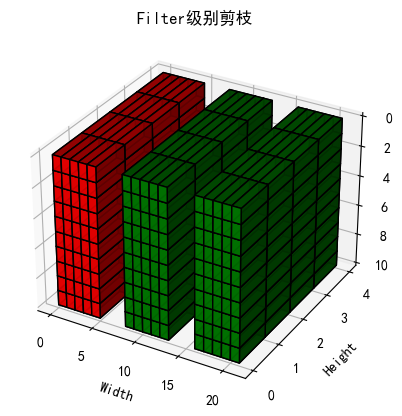

In [13]:
import torch
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # Ëß£ÂÜ≥‰∏≠Êñá‰π±Á†Å


# ÂÆö‰πâÂèØËßÜÂåñ4Áª¥Âº†ÈáèÁöÑÂáΩÊï∞
def visualize_tensor(tensor, title, batch_spacing=3):
    fig = plt.figure()  # ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑmatplotlibÂõæÂΩ¢
    ax = fig.add_subplot(111, projection='3d')  # ÂêëÂõæÂΩ¢‰∏≠Ê∑ªÂä†‰∏Ä‰∏™3DÂ≠êÂõæ

    # ÈÅçÂéÜÂº†ÈáèÁöÑÊâπÊ¨°Áª¥Â∫¶
    for batch in range(tensor.shape[0]):
        # ÈÅçÂéÜÂº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
        for channel in range(tensor.shape[1]):
            # ÈÅçÂéÜÂº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
            for i in range(tensor.shape[2]):
                # ÈÅçÂéÜÂº†ÈáèÁöÑÂÆΩÂ∫¶Áª¥Â∫¶
                for j in range(tensor.shape[3]):
                    # ËÆ°ÁÆóÊù°ÂΩ¢ÁöÑx‰ΩçÁΩÆÔºåËÄÉËôëÂà∞‰∏çÂêåÊâπÊ¨°Èó¥ÁöÑÈó¥Èöî
                    x = j + (batch * (tensor.shape[3] + batch_spacing))
                    y = i  # Êù°ÂΩ¢ÁöÑy‰ΩçÁΩÆÔºåÂç≥Âº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
                    z = channel  # Êù°ÂΩ¢ÁöÑz‰ΩçÁΩÆÔºåÂç≥Âº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
                    # Â¶ÇÊûúÂº†ÈáèÂú®ÂΩìÂâç‰ΩçÁΩÆÁöÑÂÄº‰∏∫0ÔºåÂàôËÆæÁΩÆÊù°ÂΩ¢È¢úËâ≤‰∏∫Á∫¢Ëâ≤ÔºåÂê¶Âàô‰∏∫ÁªøËâ≤
                    color = 'red' if tensor[batch, channel, i, j] == 0 else 'green'
                    # ÁªòÂà∂Âçï‰∏™3DÊù°ÂΩ¢
                    ax.bar3d(x, y, z, 1, 1, 1, shade=True, color=color, edgecolor='black', alpha=0.9)

    ax.set_title(title)  # ËÆæÁΩÆ3DÂõæÂΩ¢ÁöÑÊ†áÈ¢ò
    ax.set_xlabel('Width')  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÔºåÂØπÂ∫îÂº†ÈáèÁöÑÂÆΩÂ∫¶Áª¥Â∫¶
    ax.set_ylabel('Height')  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æÔºåÂØπÂ∫îÂº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
    ax.set_zlabel('Channel')  # ËÆæÁΩÆzËΩ¥Ê†áÁ≠æÔºåÂØπ‰∫éÂº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
    ax.set_zlim(ax.get_zlim()[::-1])  # ÂèçËΩ¨zËΩ¥ÊñπÂêë
    ax.zaxis.labelpad = 15  # Ë∞ÉÊï¥zËΩ¥Ê†áÁ≠æÁöÑÂ°´ÂÖÖ

    plt.show()  # ÊòæÁ§∫ÂõæÂΩ¢


def prune_conv_layer(conv_layer, prune_method, title="", percentile=0.2, vis=True):
    prune_layer = conv_layer.clone()

    l2_norm = None
    mask = None

    # ËÆ°ÁÆóÊØè‰∏™FilterÁöÑL2ËåÉÊï∞
    l2_norm = torch.norm(prune_layer, p=2, dim=(1, 2, 3), keepdim=True)
    threshold = torch.quantile(l2_norm, percentile)
    mask = l2_norm > threshold
    prune_layer = prune_layer * mask.float()

    visualize_tensor(prune_layer, title=prune_method)

if __name__ == '__main__':
    # ‰ΩøÁî®PyTorchÂàõÂª∫‰∏Ä‰∏™Âº†Èáè
    tensor = torch.rand((3, 10, 4, 5))

    # Ë∞ÉÁî®ÂáΩÊï∞ËøõË°åÂâ™Êûù

    pruned_tensor = prune_conv_layer(tensor, 'FilterÁ∫ßÂà´Ââ™Êûù', vis=True)

#### ÈÄöÈÅìÁ∫ßÂà´Ââ™Êûù  BCK1K2‰∏≠ÁöÑÊüê‰∫õCÂØπÂ∫îÁöÑÊâÄÊúâÁöÑK1K2

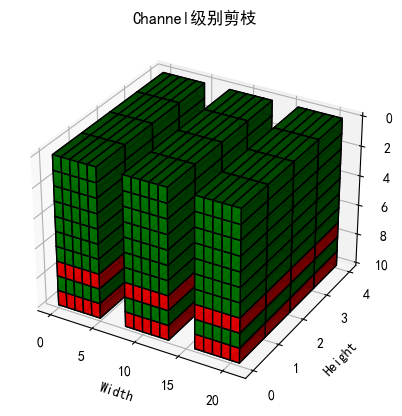

In [15]:
import torch
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # Ëß£ÂÜ≥‰∏≠Êñá‰π±Á†Å


# ÂÆö‰πâÂèØËßÜÂåñ4Áª¥Âº†ÈáèÁöÑÂáΩÊï∞
def visualize_tensor(tensor, title, batch_spacing=3):
    fig = plt.figure()  # ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑmatplotlibÂõæÂΩ¢
    ax = fig.add_subplot(111, projection='3d')  # ÂêëÂõæÂΩ¢‰∏≠Ê∑ªÂä†‰∏Ä‰∏™3DÂ≠êÂõæ

    # ÈÅçÂéÜÂº†ÈáèÁöÑÊâπÊ¨°Áª¥Â∫¶
    for batch in range(tensor.shape[0]):
        # ÈÅçÂéÜÂº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
        for channel in range(tensor.shape[1]):
            # ÈÅçÂéÜÂº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
            for i in range(tensor.shape[2]):
                # ÈÅçÂéÜÂº†ÈáèÁöÑÂÆΩÂ∫¶Áª¥Â∫¶
                for j in range(tensor.shape[3]):
                    # ËÆ°ÁÆóÊù°ÂΩ¢ÁöÑx‰ΩçÁΩÆÔºåËÄÉËôëÂà∞‰∏çÂêåÊâπÊ¨°Èó¥ÁöÑÈó¥Èöî
                    x = j + (batch * (tensor.shape[3] + batch_spacing))
                    y = i  # Êù°ÂΩ¢ÁöÑy‰ΩçÁΩÆÔºåÂç≥Âº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
                    z = channel  # Êù°ÂΩ¢ÁöÑz‰ΩçÁΩÆÔºåÂç≥Âº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
                    # Â¶ÇÊûúÂº†ÈáèÂú®ÂΩìÂâç‰ΩçÁΩÆÁöÑÂÄº‰∏∫0ÔºåÂàôËÆæÁΩÆÊù°ÂΩ¢È¢úËâ≤‰∏∫Á∫¢Ëâ≤ÔºåÂê¶Âàô‰∏∫ÁªøËâ≤
                    color = 'red' if tensor[batch, channel, i, j] == 0 else 'green'
                    # ÁªòÂà∂Âçï‰∏™3DÊù°ÂΩ¢
                    ax.bar3d(x, y, z, 1, 1, 1, shade=True, color=color, edgecolor='black', alpha=0.9)

    ax.set_title(title)  # ËÆæÁΩÆ3DÂõæÂΩ¢ÁöÑÊ†áÈ¢ò
    ax.set_xlabel('Width')  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æÔºåÂØπÂ∫îÂº†ÈáèÁöÑÂÆΩÂ∫¶Áª¥Â∫¶
    ax.set_ylabel('Height')  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æÔºåÂØπÂ∫îÂº†ÈáèÁöÑÈ´òÂ∫¶Áª¥Â∫¶
    ax.set_zlabel('Channel')  # ËÆæÁΩÆzËΩ¥Ê†áÁ≠æÔºåÂØπ‰∫éÂº†ÈáèÁöÑÈÄöÈÅìÁª¥Â∫¶
    ax.set_zlim(ax.get_zlim()[::-1])  # ÂèçËΩ¨zËΩ¥ÊñπÂêë
    ax.zaxis.labelpad = 15  # Ë∞ÉÊï¥zËΩ¥Ê†áÁ≠æÁöÑÂ°´ÂÖÖ

    plt.show()  # ÊòæÁ§∫ÂõæÂΩ¢


def prune_conv_layer(conv_layer, prune_method, title="", percentile=0.2, vis=True):
    prune_layer = conv_layer.clone()

    l2_norm = None
    mask = None

    # ËÆ°ÁÆóÊØè‰∏™channelÁöÑL2ËåÉÊï∞
    l2_norm = torch.norm(prune_layer, p=2, dim=(0, 2, 3), keepdim=True)
    threshold = torch.quantile(l2_norm, percentile)
    mask = l2_norm > threshold
    prune_layer = prune_layer * mask.float()

    visualize_tensor(prune_layer, title=prune_method)


# ‰ΩøÁî®PyTorchÂàõÂª∫‰∏Ä‰∏™Âº†Èáè
tensor = torch.rand((3, 10, 4, 5))

# Ë∞ÉÁî®ÂáΩÊï∞ËøõË°åÂâ™Êûù

pruned_tensor = prune_conv_layer(tensor, 'ChannelÁ∫ßÂà´Ââ™Êûù', vis=True)

## üìïStep2: pytorchÊ®°ÂûãËΩ¨Êç¢‰∏∫TRTÊ®°Âûã

torch2trt

torch-onnx-trt

In [3]:
import torch,os
import torchvision
from torch2trt import torch2trt

# È¢ÑÊûÑÂª∫Ê®°Âûã
# model_torch_path = "./resources/ori/yolov5n.pt"  # Á°Æ‰øùtorchÊ®°ÂûãÊòØÂåÖÂê´Ê®°ÂûãÁªìÊûÑÁöÑ„ÄÇ
model = torch.hub.load("ultralytics/yolov5", "yolov5n")  
#? Using cache found in C:\Users\Lixutong/.cache\torch\hub\ultralytics_yolov5_master

Using cache found in C:\Users\Lixutong/.cache\torch\hub\ultralytics_yolov5_master


ModuleNotFoundError: No module named 'ultralytics'

### torch2trt

Â∞Üyolov5Ê®°ÂûãËΩ¨Êç¢‰∏∫tensorrtÊ®°Âûã

torch2trt  https://github.com/NVIDIA-AI-IOT/torch2trt ; ÊúÄËøë‰∏ÄÊ¨°ÁöÑÊõ¥Êñ∞ÊòØÂú®9‰∏™Êúà‰πãÂâç

In [ ]:
"""
model = torch.load(model_path).eval().cuda()
Âú®ËØÑ‰º∞Ê®°Âºè‰∏ãÔºåÊ®°Âûã‰∏ç‰ºöÂ∫îÁî® Dropout Âíå Batch Normalization Á≠âÊäÄÊúØÔºåËøôÂèØ‰ª•ÊèêÈ´òÊ®°ÂûãÂú®Êé®ÁêÜÈò∂ÊÆµÁöÑÂáÜÁ°ÆÊÄß„ÄÇ
Âú®ËØÑ‰º∞Ê®°Âºè‰∏ãÔºåÊ®°ÂûãÁöÑË°å‰∏∫ÊòØÁ°ÆÂÆöÊÄßÁöÑÔºåËøôÊÑèÂë≥ÁùÄÂØπ‰∫éÁõ∏ÂêåÁöÑËæìÂÖ•ÔºåÊ®°ÂûãÂ∞ÜÂßãÁªà‰∫ßÁîüÁõ∏ÂêåÁöÑËæìÂá∫„ÄÇËøôÂØπ‰∫éÊ®°ÂûãÁöÑÂèØÈáçÂ§çÊÄßÈùûÂ∏∏ÈáçË¶ÅÔºåÁâπÂà´ÊòØÂú®ÈúÄË¶ÅËøõË°åÊ®°ÂûãÊØîËæÉÊàñÈ™åËØÅÁöÑÊÉÖÂÜµ‰∏ã„ÄÇÔºàÈÅøÂºÄ‰∫ÜDropout Âíå Batch Normalization„ÄÅ‰∏ÄÂºÄÂßãÁöÑÈöèÊú∫ÂàùÂßãÂåñÂíåÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÊó∂ÁöÑÊï∞ÊçÆÂ¢ûÂº∫Ôºâ
"""



def convert_torch_trt(model_torch, model_input):
    # Â∞Ü PyTorch Ê®°ÂûãËΩ¨Êç¢‰∏∫ TensorRT Ê®°Âûã
    model_trt = torch2trt(model_torch, [model_input], keep_network=False)

    # ËøõË°åÊé®ÁêÜ
    output = model_trt(model_input)

    # ËæìÂá∫ÁªìÊûú
    print(output)
    
    return model_trt



# Âä†ËΩΩ PyTorch Ê®°Âûã
model_torch_path = "./resources/ori/yolov5n.pt"  # Á°Æ‰øùtorchÊ®°ÂûãÊòØÂåÖÂê´Ê®°ÂûãÁªìÊûÑÁöÑ„ÄÇ
model_torch = torch.load(model_torch_path).eval().cpu()
model_trt_path = os.path.dirname(model_torch_path) + "/yolov5n_trt2.pt"  # ÊõøÊç¢‰∏∫‰Ω†ÁöÑÊ®°ÂûãÊñá‰ª∂Ë∑ØÂæÑ


# ËΩ¨Êç¢Ê®°Âûã
input = torch.ones((1, 3, 224, 224)).cuda()
model_trt = convert_torch_trt(model_torch, input)


#! ‰øùÂ≠ò TensorRT Ê®°Âûã(ËøôÈáå‰ªÖ‰ªÖ‰øùÂ≠ò‰∫ÜÊ®°ÂûãÁöÑÂèÇÊï∞)
torch.save(model_trt.state_dict(), model_trt_path)

ModuleNotFoundError: No module named 'models'

### torch--onnx--trt

‰ºóÂ§öÊ°à‰æãËßÅÁõ∏ÂÖ≥ÁöÑÊñá‰ª∂Ôºöonnx2trt.py and export_onnx.py

In [ ]:
## torch2onnx

def export_clip_model(clip_model):
    # clip_model = hk.model.cond_stage_model  
    #? ‰ªéÊüêÁßçÁ®ãÂ∫¶‰∏äÈúÄË¶ÅÁü•ÈÅì‰∏∫Âï•ÈÄâÊã©self.modelÁöÑcond_stage_modelÔºå
    # ÂÖ∂ÂÆûËøô‰∏™Ê®°ÂûãÂÆûÈôÖ‰∏äÊòØFrozenClipEmbddingÊ®°ÂûãÁöÑÂÆû‰æãÂåñÂØπË±°ÔºåÂåÖÂê´‰∫ÜtonkenizerÂíåtransoformerÊ®°ÂûãÔºõ

    import types

    def forward(self, tokens):
        outputs = self.transformer(
            input_ids=tokens, output_hidden_states=self.layer == "hidden"
        )
        if self.layer == "last":
            z = outputs.last_hidden_state
        elif self.layer == "pooled":
            z = outputs.pooler_output[:, None, :]
        else:
            z = outputs.hidden_states[self.layer_idx]
        return z

    clip_model.forward = types.MethodType(forward, clip_model)   
    # ËøôÈáåÂ∞Üclip_modelÁöÑÈªòËÆ§ÊâßË°åÂáΩÊï∞encodeÂáΩÊï∞ÊõøÊç¢‰∏∫forwardÂáΩÊï∞Ôºõ
    #? ‰∏∫‰ªÄ‰πà‰∏çËÉΩÂ∞ÜtokenizerÊ®°ÂûãËøõË°åONNXËΩ¨Êç¢Âë¢Ôºü
    # ‰∏ªË¶ÅÂéüÂõ†ÊòØ tokenizer ÈÄöÂ∏∏ÊòØ‰∏Ä‰∏™È¢ÑÂ§ÑÁêÜÊ≠•È™§ÔºåÂÆÉÂ∞ÜÊñáÊú¨ËæìÂÖ•ËΩ¨Êç¢‰∏∫Ê®°ÂûãÂèØ‰ª•ÁêÜËß£ÁöÑÊ†ºÂºèÔºà‰æãÂ¶ÇÔºåÂ∞ÜÊñáÊú¨ËΩ¨Êç¢‰∏∫Êï¥Êï∞Á¥¢ÂºïÔºâ„ÄÇËøô‰∏™ËøáÁ®ãÈÄöÂ∏∏‰∏çÊ∂âÂèäÂ§çÊùÇÁöÑËÆ°ÁÆóÔºåÂõ†Ê≠§‰∏çÈúÄË¶Å‰ΩøÁî® ONNX ËøõË°å‰ºòÂåñ„ÄÇ
    # ÂÆÉÂ∞ÜÊñáÊú¨ÂàÜÂâ≤Êàê‰∏Ä‰∏™‰∏™ÁöÑtokenÔºåÊûÑÂª∫ËØçÊ±áË°®ÔºåtokenÊò†Â∞ÑIDÔºåÂ∞ÜÊñáÊú¨Â∫èÂàóËΩ¨Êç¢ÊàêÊï¥Êï∞Á¥¢ÂºïÂ∫èÂàóÔºåÊúâÊó∂‰∏∫‰∫ÜÁ°Æ‰øùÊâÄÊúâËæìÂÖ•Â∫èÂàóÈïøÂ∫¶Áõ∏ÂêåÔºå‰ºöÂú®Áü≠Â∫èÂàóÂêéÈù¢Ê∑ªÂä†ÁâπÊÆäÁöÑpad tokenÔºåÊàñËÄÖËøõË°åÊà™Êñ≠„ÄÇ
    # tokenizer Ë¥üË¥£Â∞ÜËæìÂÖ•ÁöÑÊñáÊú¨ËΩ¨Êç¢‰∏∫Êï¥Êï∞Á¥¢ÂºïÔºåËÄå transformer Ê®°ÂûãÂàôË¥üË¥£Â∞ÜËøô‰∫õÊï¥Êï∞Á¥¢ÂºïËΩ¨Êç¢‰∏∫ÂµåÂÖ•ÂêëÈáè

    onnx_path = "./onnx/CLIP.onnx"

    tokens = torch.zeros(1, 77, dtype=torch.int32)
    # 77ÊòØÊØè‰∏™ËæìÂÖ•Â∫èÂàóÁöÑÈïøÂ∫¶ÔºåNLP‰∏≠ÈÄöÂ∏∏‰ºöÂ∞ÜÊú¨ÊñáÂ∫èÂàóËΩ¨Êç¢ÊàêÂõ∫ÂÆöÈïøÂ∫¶ÁöÑÊï¥Êï∞Á¥¢ÂºïÂ∫èÂàóÔºåÂ¶ÇÊûúÊ†∑Êú¨ÈïøÂ∫¶Â∞è‰∫é77‰ºöÂ°´ÂÖÖÔºåÂ¶ÇÊûúË∂ÖËøáÂàôËøõË°åÊà™Êñ≠„ÄÇ
    # 77ÊòØ‰∏Ä‰∏™ÁªèÈ™åÂÄºÔºåÈÄöÂ∏∏ÈúÄË¶ÅÊ†πÊçÆÂÆûÈôÖÈúÄÊ±ÇÂíåÊ®°ÂûãÁâπÁÇπËøõË°åË∞ÉÊï¥„ÄÇ
    
    
    #? onnxÊ≠§Êó∂ÁöÑinput_namesÂíåoutput_namesÊòØÂøÖÈ°ªË¶ÅÊúâÁöÑÔºåÂêéÁª≠onnxÊ®°ÂûãÊé®ÁêÜÂíåtrtÊ®°ÂûãÊé®ÁêÜÈúÄË¶ÅÁî®Âà∞Ôºõ
    input_names = ["input_ids"]
    output_names = ["last_hidden_state"]

    torch.onnx.export(
        clip_model,
        (tokens),
        onnx_path,
        verbose=True,
        opset_version=18,
        do_constant_folding=True,    # Ê®°Âûã‰ºòÂåñÊìç‰ΩúÔºöÂ∏∏ÈáèÊäòÂè†ÔºÅÁâõÊâπ
        input_names=input_names,
        output_names=output_names,
    )
    print("======================= CLIP model export onnx done!")

    # verify onnx model
    output = clip_model(tokens)
    input_dicts = {"input_ids": tokens.numpy()}
    # onnxruntime_check(onnx_path, input_dicts, [output])
    
    print("======================= CLIP onnx model verify done!")
    
    torch_path = "./torch_model/CLIP.pt"
    torch.save(clip_model, torch_path)

In [ ]:
## onnx2trt
import numpy as np
import os
import tensorrt as trt

def onnx2trt(onnxFile, plan_name, min_shapes, opt_shapes, max_shapes, max_workspace_size = None, use_fp16=False, builder_opt_evel=None):
    logger = trt.Logger(trt.Logger.VERBOSE)                                                         # create logger
    builder = trt.Builder(logger)                                                                   # create builder
    config = builder.create_builder_config()                                                        # create config
    network = builder.create_network(1<<int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH))      # create network
    
    if max_workspace_size:                                                                          # init config
        config.max_workspace_size = max_workspace_size
    else:
        config.max_workspace_size = 10<<30 # 10GB

    parser = trt.OnnxParser(network, logger)                                                         # create parser
    if not os.path.exists(onnxFile):
        print("Failed finding onnx file!")
        exit()
    print("Succeeded finding onnx file!")
    with open(onnxFile, 'rb') as model:
        # import pdb; pdb.set_trace()
        (onnx_path, _) = os.path.split(onnxFile)
        if not parser.parse(model.read(), path=onnxFile):                                            # parse onnx
            print("Failed parsing ONNX file!")
            for error in range(parser.num_errors):
                print(parser.get_error(error))
            exit()
    print("Succeeded parsing ONNX file!")

    if use_fp16:                                                                                      # init config
        config.set_flag(trt.BuilderFlag.FP16)
        plan_name = plan_name.replace(".plan", "_fp16.plan")

    if builder_opt_evel:
        config.builder_optimization_level = builder_opt_evel

    # set profile
    assert network.num_inputs == len(min_shapes)
    assert network.num_inputs == len(opt_shapes)
    assert network.num_inputs == len(max_shapes)

    profile = builder.create_optimization_profile()                                                   # create profile
    for i in range(network.num_inputs):                                                               # set profile
        input_tensor = network.get_input(i)
        profile.set_shape(input_tensor.name, tuple(min_shapes[i]), tuple(opt_shapes[i]), tuple(max_shapes[i]))

    config.add_optimization_profile(profile)                                                          # init config

    engine = builder.build_engine(network, config)                                                    # create engine
    if not engine:
        raise RuntimeError("build_engine failed")
    print("Succeeded building engine!")

    print("Serializing Engine...")
    serialized_engine = engine.serialize()                                                             # serialize engine
    if serialized_engine is None:
        raise RuntimeError("serialize failed")

    (plan_path, _) = os.path.split(plan_name)
    os.makedirs(plan_path, exist_ok=True)
    with open(plan_name, "wb") as fout:
        fout.write(serialized_engine)

In [ ]:
onnx_path = "./onnx/3_6_best.onnx"
plan_path = "./engine/3_6_best.plan"

# ÈùôÊÄÅshapeÔºõÂçï‰∏ÄbatchÔºõÈùûfp16Ôºõ
onnx2trt(onnx_path, plan_path, [(1, 4, 32, 48)], [(1, 4, 32, 48)], [(1, 4, 32, 48)])

# ÈùôÊÄÅshapeÔºõÂçï‰∏ÄbatchÔºõfp16Ôºõ
onnx2trt(onnx_path, plan_path, [(1, 3, 1120, 1120)], [(1, 3, 1120, 1120)], [(1, 3, 1120, 1120)], use_fp16=True)

# ÈùôÊÄÅshapeÔºõÊãºbatchÔºõfp16Ôºõ
onnx2trt(onnx_path, plan_path, [(2, 3, 1120, 1120)], [(2, 3, 1120, 1120)], [(2, 3, 1120, 1120)], use_fp16=True)

# Âä®ÊÄÅshapeÔºõÊãºbatchÔºõfp16Ôºõ
onnx2trt(onnx_path, plan_path, [(2, 3, 1120, 1120)], [(4, 3, 1120, 1120)], [(8, 3, 1120, 1120)], use_fp16=True)

print("======================= Decoder  onnx2trt done!")

## üìïStep3: Ê®°ÂûãonnxËÆ°ÁÆóÂõæËäÇÁÇπ‰ºòÂåñ

- [x] ËäÇÁÇπË£ÅÂâ™ÔºàÊü•ËØ¢„ÄÅÂà†Èô§„ÄÅÂ¢ûÂä†„ÄÅÊõøÊç¢Ôºâ
- [ ] pluginÂêàÂπ∂
- [ ] Êñ∞ËäÇÁÇπÂºÄÂèë

In [ ]:
# Êú¨ËäÇÂØºÂÖ•Â∫ì
import torch
import cv2, os,time
import numpy as np
import tensorrt as trt
import torch.nn as nn
import onnxruntime as rt

In [10]:
# ÊûÑÂª∫‰∏Ä‰∏™onnxÊ®°Âûã
class DemoModel(torch.nn.Module):
    def __init__(self):
        super(DemoModel, self).__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1)
        self.relu = nn.ReLU()
        self.fc = torch.nn.Linear(2, 2)
 
    def forward(self, x):
        x = self.relu(x)
        x = self.relu(x)
        x = self.relu(x)
        x = self.conv(x)
        x = self.relu(x)
        x = self.fc(x)
        return x
    
model = DemoModel()
input = torch.randn(1,1,2,2)
torch.onnx.export(model, input, "./resources/onnx/demo.onnx", input_names=["input"], output_names=["output"])
print(model)

============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

DemoModel(
  (conv): Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1))
  (relu): ReLU()
  (fc): Linear(in_features=2, out_features=2, bias=True)
)


https://blog.csdn.net/csdnsqst0050/article/details/137079485
onnxÊ®°Âûãgraph„ÄÅnodeÂíåtensorÁöÑÂ±ûÊÄß

https://blog.csdn.net/jacke121/article/details/128059994
ÔºöÂåÖÂê´‰∫ÜÂØπPReluÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂàùÂßãÂåñÂº†Èáè‰øÆÊîπÔºåmodel.graph.initializerÂåÖÂê´‰∫ÜÊ®°Âûã‰∏≠ÊâÄÊúâÁöÑÂàùÂßãÂåñÂô®ÔºåÂàùÂßãÂåñÂô®‰∏éÊ®°Âûã‰∏≠ÁöÑËäÇÁÇπÂÖ≥ËÅî„ÄÇ


In [ ]:
# ÊúÄËøëÊúâÈÅáÂà∞ÈúÄË¶ÅÂ∞ÜonnxÊ®°ÂûãÁöÑ‰∏≠Èó¥ËäÇÁÇπË£ÅÂâ™ÊéâÁöÑÊÉÖÂÜµÔºåmxnetËΩ¨ÊàêÁöÑcaffÊ®°ÂûãÔºåÈ¢ÑÂ§ÑÁêÜÔºàÂáèÂéªÂùáÂÄºÈô§‰ª•ÊñπÂ∑ÆÁöÑÊìç‰ΩúÔºâÂÜôÂú®‰∫ÜÊ®°ÂûãÁªìÊûÑÈáåÔºåÈáèÂåñÊó∂Ë¶ÅÊääÈ¢ÑÂ§ÑÁêÜÂ±ÇÂçïÁã¨ÊãøÂá∫Êù•ÔºåËøô‰∏™Êìç‰ΩúÊúâ‰∏§ÁßçÊñπÊ≥ïÂèØ‰ª•ÂÆûÁé∞Ôºå‰∏ÄÁßçÂèØ‰ª•Âä†ËΩΩmxnetËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÔºåÂéªÊéâÈ¢ÑÂ§ÑÁêÜÂêéÂÜç‰øùÂ≠òÔºõÂè¶‰∏ÄÁßçÊó∂Áõ¥Êé•Â∞Üonnx‰∏≠ÂØπÂ∫îÁöÑ‰∏§‰∏™È¢ÑÂ§ÑÁêÜËäÇÁÇπË£ÅÊéâÔºåËøôÈáåÂÜô‰∏Ä‰∏ãÁ¨¨‰∫åÁßçÊñπÊ≥ïÂÖ∑‰ΩìÂÆûÁé∞

import onnx_graphsurgeon as gs
import numpy as np
import onnx

# remove preprocessing node
# (x - mean)/std
def remove_preprocessing_node(onnx_path):
    onnx_model = onnx.load(onnx_path)    #Âä†ËΩΩonnxÊ®°Âûã
    graph = onnx_model.graph
    old_nodes = graph.node
    
    # üìïÊü•ÁúãonnxÊ®°ÂûãÂêÑ‰∏™ËäÇÁÇπÁöÑÂêçÁß∞
    for node in old_nodes:
        print("[original graph] node.name: {} ({}); input: {}; output: {}".format(node.name, node.op_type, node.input, node.output))
        # print(node.attribute) #? üìïÊü•ÁúãËäÇÁÇπÁöÑÂ±ûÊÄß
    
    
    # üìïÊü•ËØ¢ËäÇÁÇπÔºöÈÄöËøánodeÁöÑ‰∏ä‰∏ãÊñáËäÇÁÇπopÁ±ªÂûãÊù•Êü•ËØ¢ÔºåÂπ∂ËÆ∞ÂΩïÂÖ∂Âú®graph.node‰∏≠ÁöÑÁ¥¢ÂºïÔºÅ
    for i in range(len(old_nodes)):
        if old_nodes[i].op_type == 'Constant':
            node_rise = node[i]
            if node_rise.output[0] == '449':
                print(i)  # 157
    
    
    # üìïÂà†Èô§Ââç‰∏§‰∏™reluËäÇÁÇπ
    new_nodes = old_nodes[2:]               
    del onnx_model.graph.node[:]            # Âà†Èô§ÂΩìÂâçonnxÊ®°ÂûãÁöÑÊâÄÊúânode
    onnx_model.graph.node.extend(new_nodes) # extendÊñ∞ÁöÑËäÇÁÇπ
    
    relu_node = onnx_model.graph.node[0]   # Ëé∑ÂèñÊñ∞ÁöÑËäÇÁÇπÂàóË°®‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™ËäÇÁÇπÔºåÈÄöÂ∏∏ÊòØÂç∑ÁßØÂ±ÇÁöÑËäÇÁÇπÔºåÂπ∂Â∞ÜÂÖ∂ËµãÂÄºÁªôÂèòÈáè conv0_node„ÄÇ
    relu_node.input[0] = 'input'            # ÁªôÁ¨¨‰∏ÄÂ±ÇÁöÑÂç∑ÁßØËäÇÁÇπËÆæÁΩÆËæìÂÖ•ÁöÑdataËäÇÁÇπ
    
    
    # üìïÊü•ÁúãonnxÊ®°ÂûãÂêÑ‰∏™ËäÇÁÇπÁöÑÂêçÁß∞
    for node in onnx_model.graph.node:
        print("[target graph] node.name: {} ({}); input: {}; output: {}".format(node.name, node.op_type, node.input, node.output))
    
    
    # üìïÂ∞ÜÁ¨¨‰∏â‰∏™reluËΩ¨Êç¢ÊàêconvËäÇÁÇπ
    relu_node = onnx_model.graph.node[0]
    conv_node = onnx.helper.make_node(
        op_type="Conv",
        inputs=["input", 'conv.weight', 'conv.bias'],
        outputs=[relu_node.output[0]],
        name="conv0_0",
        kernel_shape=[3, 3],  # Âç∑ÁßØÊ†∏ÁöÑÂΩ¢Áä∂
        strides=[1, 1],       # Ê≠•Èïø
        pads=[1, 1, 1, 1],    # Â°´ÂÖÖ
        )
    
    # üìï Âà†Èô§ÂíåÊèíÂÖ•ËäÇÁÇπ
    # ÊõøÊç¢ relu ËäÇÁÇπ‰∏∫ conv ËäÇÁÇπ
    graph.node.remove(relu_node)  # remove‰ºöÊ†πÊçÆËäÇÁÇπÂØπË±°ÁöÑÂºïÁî®Êù•ÂÆö‰ΩçË¶ÅÂà†Èô§ÁöÑËäÇÁÇπ
    graph.node.insert(0, conv_node)  # append‰ºöÂ∞ÜËäÇÁÇπÂØπË±°Ê∑ªÂä†Âà∞ÂàóË°®Êú´Â∞æ
    
    # üìïÊü•ÁúãonnxÊ®°ÂûãÂêÑ‰∏™ËäÇÁÇπÁöÑÂêçÁß∞
    for node in onnx_model.graph.node:
        print("[target2 graph] node.name: {} ({}); input: {}; output: {}".format(node.name, node.op_type, node.input, node.output))

    
    # graph = onnx_model.graph
    # print(graph.node)
    onnx.checker.check_model(onnx_model)
    onnx.save(onnx_model, "./resources/onnx/demo_del_nodes.onnx")


if __name__ == "__main__":
    onnx_path = "./resources/onnx/demo.onnx"
    remove_preprocessing_node(onnx_path)

[original graph] node.name: /relu/Relu (Relu); input: ['input']; output: ['/relu/Relu_output_0']
[original graph] node.name: /relu_1/Relu (Relu); input: ['/relu/Relu_output_0']; output: ['/relu_1/Relu_output_0']
[original graph] node.name: /relu_2/Relu (Relu); input: ['/relu_1/Relu_output_0']; output: ['/relu_2/Relu_output_0']
[original graph] node.name: /conv/Conv (Conv); input: ['/relu_2/Relu_output_0', 'conv.weight', 'conv.bias']; output: ['/conv/Conv_output_0']
[original graph] node.name: /relu_3/Relu (Relu); input: ['/conv/Conv_output_0']; output: ['/relu_3/Relu_output_0']
[original graph] node.name: /fc/MatMul (MatMul); input: ['/relu_3/Relu_output_0', 'onnx::MatMul_13']; output: ['/fc/MatMul_output_0']
[original graph] node.name: /fc/Add (Add); input: ['fc.bias', '/fc/MatMul_output_0']; output: ['output']
[target graph] node.name: /relu_2/Relu (Relu); input: ['input']; output: ['/relu_2/Relu_output_0']
[target graph] node.name: /conv/Conv (Conv); input: ['/relu_2/Relu_output_0',

## üìïStep3: Ê®°ÂûãEasy‰ºòÂåñÁ≠ñÁï•

FP16 CUDA_GRAPH BUILDOPTIMALLEVEL ÊãºBatch 

trtexecË∞ÉËØïÂ∑•ÂÖ∑Ôºötrtexec --help 


trtexec

**onnxÊ®°ÂûãËΩ¨Êç¢trtÊ®°Âûã**

--**onnx=modelA.onnx**

--**saveEngine=model-02.plan**

--timingCacheFile=model-02.cache

**--minshapes=tensorX:1x1x28x28**

**--optshapes=tensorX:4x1x28x28**

**--maxShapes=tensorX:16x1x28x28**

**--fp16**

--nOTF32

--memPoolsize=workspace:1024MiB--builderoptimizationLevel=5

--maxAuxStreams=4

**--skipInference**

**--verbose**

**>result-02.log 2>&1**

**trtÊ®°ÂûãÊâßË°å**

**trtexec model-02.plan**

--trt

**--shapes=tensorX:4x1x28x28**

--noDataTransfers

--usespinwait

**--usecudaGraph**

--verbose

**>result-03.log 2>&1**




In [ ]:
# FP16
# pythonËÑöÊú¨‰ΩøÁî®ÔºöÂú®onnx2trtÊó∂ÊåáÂÆöfp16
# cliÔºö1. trtexec --onnx=model.onnx --saveEngine=model_fp16.engine --fp16   # ÁîüÊàêengineÊñá‰ª∂
# cliÔºö2. trtexec model_fp16.engine --trt                                   # Âü∫‰∫éFP16ÊµãËØïÊé®ÁêÜ

# cuda graph
# pythonËÑöÊú¨‰ΩøÁî®Ôºöengine.py‰∏≠Ê®°ÂûãÊé®ÁêÜÂâçÂà§Êñ≠ÊòØÂê¶‰ΩøÁî®cuda graph
# cliÔºö1. trtexec --onnx=model.onnx --saveEngine=model_fp16.engine --fp16   # ÁîüÊàêengineÊñá‰ª∂
# cliÔºö2. trtexec model_fp16.engine --trt  --cudaGraph                      # Âü∫‰∫éFP16 + CUDAGRAPHÊµãËØïÊé®ÁêÜ

## BUILDOPTIMALLEVEL
# pythonËÑöÊú¨‰ΩøÁî®Ôºöonnx2trt.py‰∏≠ config.builder_optimal_level = 3
# cliÔºö1. trtexec --onnx=model.onnx --saveEngine=model_fp16.engine --builderOptimizationLevel   # ÁîüÊàêengineÊñá‰ª∂
# cliÔºö2. trtexec model.engine --trt                                   # ÊµãËØïÊé®ÁêÜ

## ÊãºBatch
# pythonËÑöÊú¨‰ΩøÁî®Ôºöonnx2trt‰∏≠ÈÄöËøáprofile.set_shapeÊåáÂÆöÂä®ÊÄÅshape
# pythonËÑöÊú¨‰ΩøÁî®Ôºötorch.nn.export‰∏≠ÊåáÂÆödynamic_axes„ÄÇ
# cliÔºö1. trtexec model.engine --trt                                   # ÊµãËØïÊé®ÁêÜ

## Step3: Ê®°ÂûãHard‰ºòÂåñÁ≠ñÁï•

INT8ÈáèÂåñ Ê®°ÂûãÊ∑±Â∫¶Âä†ÈÄü

### trtexecÈáèÂåñ

In [ ]:
# trtexec PTQ ÈáèÂåñ

# int8ÈáèÂåñ ‰∏çÊé®Ëçê Êó†Êï∞ÊçÆÈõÜÊ†°ÂáÜ Á≤æÂ∫¶‰∏ãÈôçËæÉÂ§ß
#trtexec --onnx=XX.onnx --saveEngine=model.plan --int8 --workspace=4096

# int8ÂíåFP16Ê∑∑ÂêàÈáèÂåñ ‰∏çÊé®Ëçê Êó†Êï∞ÊçÆÈõÜÊ†°ÂáÜ Á≤æÂ∫¶‰∏ãÈôçËæÉÂ§ß
#trtexec --onnx=XX.onnx --saveEngine=model.plan --int8 --fp16 --workspace=4096


### torchÂä®ÊÄÅÈáèÂåñ

In [ ]:
"""
Âè™ÈáèÂåñÊùÉÈáçÔºå‰∏çÈáèÂåñÊøÄÊ¥ª
"""
import torch
from torch import nn
 
class DemoModel(torch.nn.Module):
    def __init__(self):
        super(DemoModel, self).__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=1)
        self.relu = nn.ReLU()
        self.fc = torch.nn.Linear(2, 2)
 
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.fc(x)
        return x
 
 
if __name__ == "__main__":
    model_fp32 = DemoModel()
    # ÂàõÂª∫‰∏Ä‰∏™ÈáèÂåñÁöÑÊ®°ÂûãÂÆû‰æã
    model_int8 = torch.quantization.quantize_dynamic(
        model=model_fp32,  # ÂéüÂßãÊ®°Âûã
        qconfig_spec={torch.nn.Linear},  # Ë¶ÅÂä®ÊÄÅÈáèÂåñÁöÑNNÁÆóÂ≠ê
        dtype=torch.qint8)  # Â∞ÜÊùÉÈáçÈáèÂåñ‰∏∫Ôºöfloat16 \ qint8
 
    print(model_fp32)
    print(model_int8)
 
    # ËøêË°åÊ®°Âûã
    input_fp32 = torch.randn(1,1,2, 2)
    output_fp32 = model_fp32(input_fp32)
    print(output_fp32)
 
    output_int8 = model_int8(input_fp32)
    print(output_int8)

### torchÈùôÊÄÅÈáèÂåñ

In [ ]:
"""
ÊùÉÈáçÂíåÊøÄÊ¥ªÈÉΩ‰ºöË¢´ÈáèÂåñ
"""
 
import torch
from torch import nn
 
 
# ÂÆö‰πâ‰∏Ä‰∏™ÊµÆÁÇπÊ®°ÂûãÔºåÂÖ∂‰∏≠‰∏Ä‰∫õÂ±ÇÂèØ‰ª•Ë¢´ÈùôÊÄÅÈáèÂåñ
class F32Model(torch.nn.Module):
    def __init__(self):
        super(F32Model, self).__init__()
        self.quant = torch.quantization.QuantStub()      # QuantStub: ËΩ¨Êç¢Âº†Èáè‰ªéÊµÆÁÇπÂà∞ÈáèÂåñ
        self.conv = nn.Conv2d(1, 1, 1)
        self.fc = nn.Linear(2, 2, bias=False)
        self.relu = nn.ReLU()
        self.dequant = torch.quantization.DeQuantStub()  # DeQuantStub: Â∞ÜÈáèÂåñÂº†ÈáèËΩ¨Êç¢‰∏∫ÊµÆÁÇπ
 
    def forward(self, x):
        x = self.quant(x)  # ÊâãÂä®ÊåáÂÆöÂº†Èáè: ‰ªéÊµÆÁÇπËΩ¨Êç¢‰∏∫ÈáèÂåñ
        x = self.conv(x)
        x = self.fc(x)
        x = self.relu(x)
        x = self.dequant(x)  # ÊâãÂä®ÊåáÂÆöÂº†Èáè: ‰ªéÈáèÂåñËΩ¨Êç¢Âà∞ÊµÆÁÇπ
        return x
 
 
model_fp32 = F32Model()
model_fp32.eval()       # Ê®°ÂûãÂøÖÈ°ªËÆæÁΩÆ‰∏∫evalÊ®°ÂºèÔºåÈùôÊÄÅÈáèÂåñÈÄªËæëÊâçËÉΩÂ∑•‰Ωú
 
# 1„ÄÅÂ¶ÇÊûúË¶ÅÈÉ®ÁΩ≤Âú®ARM‰∏äÔºõÊûúË¶ÅÈÉ®ÁΩ≤Âú®x86 server‰∏ä ‚Äòfbgemm‚Äô
# model_fp32.qconfig = torch.ao.quantization.get_default_qconfig('qnnpack')
 # model_fp32.qconfig = torch.ao.quantization.get_default_qconfig('fbgemm')
model_fp32.qconfig = torch.ao.quantization.get_default_qat_qconfig('x86')   # x86 ÂÆòÊñπÊé®ËçêÁöÑÈáèÂåñÈÖçÁΩÆ

# 2„ÄÅÂú®ÈÄÇÁî®ÁöÑÊÉÖÂÜµ‰∏ãÔºåÂ∞Ü‰∏Ä‰∫õÂ±ÇËøõË°åËûçÂêàÔºåÂèØ‰ª•Âä†ÈÄü
# Â∏∏ËßÅÁöÑËûçÂêàÂåÖÊã¨Âú®ÔºöDEFAULT_OP_LIST_TO_FUSER_METHOD
# this needs to be done manually depending on the model architecture
model_fp32_fused = torch.ao.quantization.fuse_modules(model_fp32, [['fc', 'relu']])
 
# 3„ÄÅÂáÜÂ§áÊ®°ÂûãÔºåÊèíÂÖ•observersÔºåËßÇÂØü activation Âíå weight
model_fp32_prepared = torch.ao.quantization.prepare(model_fp32_fused.train())
 
# 4„ÄÅ‰ª£Ë°®ÊÄßÊï∞ÊçÆÈõÜÔºåËé∑ÂèñÊï∞ÊçÆÁöÑÂàÜÂ∏ÉÁâπÁÇπÔºåÊù•Êõ¥Â•ΩÁöÑËÆ°ÁÆóactivationÁöÑ scale Âíå zp
input_fp32 = torch.randn(1, 1, 2, 2)  # (batch_size, channel, W, H)
model_fp32_prepared(input_fp32)
 
# 5„ÄÅÈáèÂåñÊ®°Âûã
model_fp32_prepared.eval()
model_int8 = torch.ao.quantization.convert(model_fp32_prepared)
 
# ËøêË°åÊ®°ÂûãÔºåÁõ∏ÂÖ≥ËÆ°ÁÆóÂ∞ÜÂú®int8‰∏≠ËøõË°å
output_fp32 = model_fp32(input_fp32)
output_int8 = model_int8(input_fp32)
print(output_fp32)
# tensor([[[[0.6315, 0.0000],
#           [0.2466, 0.0000]]]], grad_fn=<ReluBackward0>)
print(output_int8)
# tensor([[[[0.3886, 0.0000],
#           [0.2475, 0.0000]]]])

tensor([[[[0.1144, 0.0000],
          [0.0765, 0.0000]]]], grad_fn=<ReluBackward0>)
tensor([[[[0.1165, 0.0000],
          [0.0762, 0.0000]]]])


## üìïStep4: Ê®°ÂûãËΩ¨Êç¢ËæìÂá∫ÁªìÊûúÂØπÊØî

‰∏âÁßçÊ®°ÂûãÂΩ¢ÊÄÅÔºåÂàÜÂà´ÊòØtorchÔºåonnxÔºåtensorrt

ËôΩÁÑ∂Ê®°ÂûãÂΩ¢ÊÄÅ‰∏ç‰∏ÄËá¥Ôºå‰ΩÜÊòØÂÆûÈôÖËæìÂá∫ÁªìÊûúÁöÑshapeÊòØ‰∏ÄËá¥ÁöÑ„ÄÇÂõ†Ê≠§ÂèØ‰ª•‰∏çÂøÖÂå∫ÂàÜÊ®°ÂûãËæìÂá∫ÊâÄÂ±ûÁöÑÊ®°ÂûãÁ±ªÂà´

In [ ]:
# Êú¨ËäÇÂØºÂÖ•Â∫ì
import torch
import cv2, os,time
import numpy as np
import tensorrt as trt
import onnxruntime as rt

### Ê£ÄÊü•ËΩ¨Êç¢ÂâçÊ®°ÂûãÂíåËΩ¨Êç¢ÂêéÊ®°ÂûãÁöÑËæìÂá∫ÊòØÂê¶‰∏ÄËá¥

In [ ]:
# ÊûÑÂª∫‰∏Ä‰∏™ Ê£ÄÊü•ËΩ¨Êç¢ÂâçÊ®°ÂûãÂíåËΩ¨Êç¢ÂêéÊ®°ÂûãÁöÑËæìÂá∫ÊòØÂê¶‰∏ÄËá¥ÁöÑÂáΩÊï∞
def check_model_output(original_outputs: np.array, converted_outputs: np.array):
    
    # Ê£ÄÊü•ËæìÂá∫ÂΩ¢Áä∂ÊòØÂê¶‰∏ÄËá¥
    if original_outputs.shape != converted_outputs.shape:
        return False
    
    # ÈÅçÂéÜÊØè‰∏™Ê†∑Êú¨
    for i in range(0, len(original_outputs)):
        single_original_output = original_outputs[i]
        single_converted_output = converted_outputs[i]
        
        # Ê£ÄÊü•1: ËæìÂá∫ÊÄªÂíåÁöÑÂ∑ÆÂºÇÂú®ÂÆπÂøçÂ∫¶‰ª•ÂÜÖ
        ret = np.allclose(single_original_output, single_converted_output, rtol=1e-03, atol=1e-05, equal_nan=False)
        
        if ret is False:
            print("[ERROR] onnxruntime_check")
            # Ê£ÄÊµãresult[i]ÁöÑËæìÂá∫‰∏≠ÊòØÂê¶ÂåÖÂê´nan
            if np.isnan(single_original_output).any():   print("single_original_output.nan")
            if np.isnan(single_converted_output).any():  print("single_converted_output.nan")
        else:
            print("onnxruntime_check [PASS]")
        
        
        # Ê£ÄÊü•2: ËæìÂá∫ÂíåÂ∑ÆÂÄº
        output_sum_diff = np.abs(np.round(np.sum(single_original_output) - np.sum(single_converted_output), 6))
        print("[Output_Sum_Diff] (|original - converted|) :", output_sum_diff)
        
        
        # Ê£ÄÊü•3: ËæìÂá∫ÁöÑÂΩ¢Áä∂
        print("[Shape] original: {};  converted: {};".format(single_original_output.shape, single_converted_output.shape))
        
        
        # Ê£ÄÊü•4: ÂÆöÂà∂ÂåñËæìÂá∫
        print("[Output] original  :", np.round(np.sum(single_original_output), 6))
        print("[Output] converted :",  np.round(np.sum(single_converted_output), 6))
        
        print("-----------------------------------------")
        
        
    input("[Temp] onnxruntime_check done! details are shown above! \npress any key to continue...")
    

### È™åËØÅONNXÊ®°ÂûãÊòØÂê¶ÊúâÊïà

In [ ]:
import onnx

# Preprocessing: load the ONNX model
model_path = 'path/to/the/model.onnx'
onnx_model = onnx.load(model_path)

print('The model is:\n{}'.format(onnx_model))

# Check the model
try:
    onnx.checker.check_model(onnx_model)
except onnx.checker.ValidationError as e:
    print('The model is invalid: %s' % e)
else:
    print('The model is valid!')

## üìïStep5: ÂêÑÁ±ªÊ®°ÂûãÈÖçÁΩÆÂíåË∞ÉÁî®

‰ªéÁºñÁ®ãËØ≠Ë®ÄÁöÑËßíÂ∫¶ÔºåÂèØ‰ª•ÂàÜÊàêc++ÁâàÊú¨ÂíåpythonÁâàÊú¨„ÄÇ

‰ªéÊ®°ÂûãÁ±ªÂà´ÁöÑËßíÂ∫¶ÔºåÂèØ‰ª•ÂàÜ‰∏∫torchÊ®°Âûã„ÄÅonnxÊ®°ÂûãÂíåtensorrtÊ®°Âûã„ÄÇ

‰ª•yolov5‰∏∫‰æãÔºåÈÖçÂ§áÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÁ±ªÂíåÂêéÂ§ÑÁêÜÁ±ª„ÄÇËøõË°åË∞ÉÁî®

In [2]:
# Êú¨ËäÇÂØºÂÖ•Â∫ì
import torch
import cv2, os,time
import numpy as np
import tensorrt as trt
import onnxruntime as rt
from tools.amisc import preprocess_image, PostProcessor, PreProcessor, draw_boxes

# È¢ÑÊûÑÂª∫Ê®°Âûã
# model_torch_path = "./resources/ori/yolov5n.pt"  # Á°Æ‰øùtorchÊ®°ÂûãÊòØÂåÖÂê´Ê®°ÂûãÁªìÊûÑÁöÑ„ÄÇ
model = torch.hub.load("ultralytics/yolov5", "yolov5n")  
#? Using cache found in C:\Users\Lixutong/.cache\torch\hub\ultralytics_yolov5_master

# È¢ÑÊûÑÂª∫ËæìÂÖ•Êï∞ÊçÆ
image_path = "./resources/imgs/NG_bootDent_0810.png"
image_tensor = preprocess_image(image_path, (1, 3, 640, 640))
print("[preprocess] image_tensor.shape: ", image_tensor.shape)

# Âü∫Êú¨ÈÖçÁΩÆ
model_inputSize = (1120, 1120)
conf_thresh = 0.9
nms_thresh = 0.5

Using cache found in C:\Users\Lixutong/.cache\torch\hub\ultralytics_yolov5_master


KeyboardInterrupt: 

### torchÊ®°ÂûãÁöÑÈÖçÁΩÆÂíåË∞ÉÁî®

In [2]:
# torchÊ®°ÂûãÁöÑÂä†ËΩΩÂíå‰øùÂ≠ò
model_torch_path = "./resources/ori/yolov5n.pt"  # Á°Æ‰øùtorchÊ®°ÂûãÊòØÂåÖÂê´Ê®°ÂûãÁªìÊûÑÁöÑ„ÄÇ
model_torch = torch.load(model_torch_path).eval().cpu()


output = model_torch(image_tensor)
print(output.shape)


# torchÊ®°ÂûãÁöÑ‰øùÂ≠ò
model_torch_save_path = os.path.dirname(model_torch_path) + "/yolov5n_save.pt"
torch.save(model_torch, model_torch_save_path)

ModuleNotFoundError: No module named 'models'

### onnxÊ®°ÂûãÁöÑÈÖçÁΩÆÂíåË∞ÉÁî®

In [40]:
onnx_path          = "/data/Projects/StableDiffusionEO/onnx/3_6_best.onnx"
save_img_path_onnx = "./practice_yolov5/test_onnx.jpg"
onnx_names         = {"input": "images", "output": "output0"}



## ---------- ÂõæÂÉèËØªÂèñ ----------
origin_img = cv2.imread(image_path)
if origin_img is not None: print("[Read Image] Ê≠£Â∏∏ËØªÂèñÂõæÂÉè; shape: {};".format(origin_img.shape))
else: print("[Read Image] Êó†Ê≥ïËØªÂèñÂõæÂÉèÔºåËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÊòØÂê¶Ê≠£Á°Æ„ÄÇ")



## ---------- Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ ----------
prepocess = PreProcessor(inpHeight=model_inputSize[0], inpWidth=model_inputSize[0])
x, hw_scale, left, top = prepocess(origin_img)
image_tensor = x[None, :, :, :]  # add bs
image_tensor = torch.from_numpy(image_tensor)
print("[prepocess]: preprocess data.shape: {}; model_input.shape:{}".format(x.shape, image_tensor.shape))



## ---------- trtÊ®°ÂûãÈÖçÁΩÆÂíåONNXÊ®°ÂûãÈÖçÁΩÆ ----------
# onnxÊ®°ÂûãÊé®ÁêÜ
input_dicts = {onnx_names["input"]:image_tensor.numpy()}
sess = rt.InferenceSession(onnx_path)      



## ---------- TRTÊ®°ÂûãÊé®ÁêÜÂíåONNXÊ®°ÂûãÊé®ÁêÜ ----------
start_time = time.time()
outputs_onnx = sess.run(None, input_dicts)[0]       
end_time = time.time()
print("[Infer ONNX] shape:{}; type: {};".format(outputs_onnx.shape, type(outputs_onnx)))
print("[Infer ONNX] time :{}".format(end_time - start_time))
print("[Infer ONNX] data :{}".format(outputs_onnx))


NameError: name 'cv2' is not defined

### TensorRTÊ®°ÂûãÁöÑÈÖçÁΩÆÂíåË∞ÉÁî®

In [ ]:
from tools.Engine_yolov5 import Engine

clip_engine_path   = "/data/Projects/StableDiffusionEO/engine/3_6_best.plan"
save_img_path_trt  = "./practice_yolov5/test_trt.jpg"
onnx_names         = {"input": "images", "output": "output0"}



## ---------- ÂõæÂÉèËØªÂèñ ----------
origin_img = cv2.imread(image_path)
if origin_img is not None: print("[Read Image] Ê≠£Â∏∏ËØªÂèñÂõæÂÉè; shape: {};".format(origin_img.shape))
else: print("[Read Image] Êó†Ê≥ïËØªÂèñÂõæÂÉèÔºåËØ∑Ê£ÄÊü•Êñá‰ª∂Ë∑ØÂæÑÊòØÂê¶Ê≠£Á°Æ„ÄÇ")



## ---------- Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ ----------
prepocess = PreProcessor(inpHeight=model_inputSize[0], inpWidth=model_inputSize[0])
x, hw_scale, left, top = prepocess(origin_img)
image_tensor = x[None, :, :, :]  # add bs
image_tensor = torch.from_numpy(image_tensor)
print("[prepocess]: preprocess data.shape: {}; model_input.shape:{}".format(x.shape, image_tensor.shape))



## ---------- trtÊ®°ÂûãÈÖçÁΩÆÂíåONNXÊ®°ÂûãÈÖçÁΩÆ ----------
clip_engine = Engine(clip_engine_path)
clip_engine.load()
model_feed_dict = clip_engine.yolov5_model_shape_dict()
clip_engine.activate()
clip_engine.allocate_buffers(model_feed_dict)
clip_engine.get_engine_infor()



## ---------- TRTÊ®°ÂûãÊé®ÁêÜÂíåONNXÊ®°ÂûãÊé®ÁêÜ ----------
start_time = time.time()
outputs_trt = clip_engine.infer({onnx_names["input"]:image_tensor})[onnx_names["output"]].cpu().detach().numpy()
end_time = time.time()
print("[Infer TRT] shape:{}; type: {}".format(outputs_trt.shape, type(outputs_trt)))
print("[Infer TRT] time :{}".format(end_time - start_time))
print("[Infer TRT] data :{}".format(outputs_trt))


In [ ]:


## ---------- post process ----------
# postprocessor
ratioh = origin_img.shape[0] / prepocess.inpHeight
ratiow = origin_img.shape[1] / prepocess.inpWidth
postprocess = PostProcessor(conf_thresh=conf_thresh, nms_thresh=nms_thresh, left = left, top =top, ratioh=ratioh,ratiow=ratiow)
posted_result_trt = postprocess(outputs_trt)
posted_result_onnx = postprocess(outputs_onnx)


posted_result_trt_img0  = posted_result_trt[0]
posted_result_onnx_img0 = posted_result_onnx[0]
print("[Postprocess  TRT]: ", posted_result_trt_img0.shape)
print("[Postprocess  TRT]: ", posted_result_trt_img0)
print("[Postprocess ONNX]: ", posted_result_onnx_img0.shape)
print("[Postprocess ONNX]: ", posted_result_onnx_img0)


## ---------- draw_boxes ----------
if save_img_path_trt  is not None and os.path.exists(os.path.dirname(save_img_path_trt)): 
    draw_boxes(origin_img, posted_result_trt_img0,  save_path = save_img_path_trt)
if save_img_path_onnx is not None and os.path.exists(os.path.dirname(save_img_path_trt)): 
    draw_boxes(origin_img, posted_result_onnx_img0, save_path = save_img_path_onnx)




## ---------- Ê£ÄÊü•ÁªìÊûú ----------
check_model_output(outputs_onnx, outputs_trt, posted_result_onnx, posted_result_trt)